In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from helpers.SimulationAnalysis import readHlist
#from fast3tree import fast3tree

In [2]:
plt.rcdefaults()
%matplotlib inline
plt.rcParams['font.size'] = 16.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.numpoints'] = 1

In [13]:
from notebook_load_functions import *

In [4]:
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
cases = ['c250-2048', 'c250-1024', 'c250-768', 'c250-512','c250-2560',
         'c400-2048', 'c400-1024', 'c400-768', 'c125-2048', 'c125-1024']
nd_log_list = np.linspace(-3.3, -1.7, 17)
rbins = np.logspace(-1.3, 1.3, 27)

In [18]:
_pairs_sim_central_cache = {}
def load_sim_central_pair_count(proxy, case, nd_log, cumulative=False):
    key = (proxy, case, nd_log)
    if key not in _pairs_sim_central_cache:
        if os.path.isfile(filepath.path_sim_lowres_counts + 'pairs_{}/central/{}_nd{:.1f}_run0.npy'.format(*key)):
            _pairs_sim_central_cache[key] = np.load(filepath.path_sim_lowres_counts + 'pairs_{}/central/{}_nd{:.1f}_run0.npy'.format(*key)).astype(float)      
        else:
            _pairs_sim_central_cache[key] = np.load(filepath.path_sim_lowres_counts + 'pairs_{}/central/{}_nd{:.1f}_run1.npy'.format(*key)).astype(float)      
    return _pairs_sim_central_cache[key] if cumulative else np.ediff1d(_pairs_sim_central_cache[key][::2])

In [5]:
from AbundanceMatching import AbundanceFunction
from urllib import urlopen

af = np.loadtxt(urlopen('https://arxiv.org/src/1304.7778v2/anc/LF_Ser.dat'), usecols=(0,1))
af[:,0] -= 5.0*np.log10(0.7)
af[:,1] = (10.**af[:,1])/(0.7**3)
af = AbundanceFunction(*af.T, ext_range=(-25, -16), faint_end_fit_points=5)

for Mr in np.arange(-22.0, -16.9, 0.5):
    print '{:.1f}  {:.3f}'.format(Mr, np.log10(af.number_density_at(Mr)))

-22.0  -3.558
-21.5  -3.062
-21.0  -2.660
-20.5  -2.350
-20.0  -2.108
-19.5  -1.915
-19.0  -1.770
-18.5  -1.652
-18.0  -1.550
-17.5  -1.458
-17.0  -1.379


In [6]:
nd_log = -1.7
low1 = np.ediff1d(np.load('/u/ki/yymao/ki06/resolution_test/pairs_vmax/c250-1024_nd{:.1f}_c.npy'.format(nd_log)))
low2 = np.ediff1d(np.load('/u/ki/yymao/ki06/resolution_test/pairs_vmax/c250-1024_nd{:.1f}_f.npy'.format(nd_log)))
high1 = np.ediff1d(np.load('/u/ki/yymao/ki06/resolution_test/pairs_vmax/c250-2048_nd{:.1f}_c.npy'.format(nd_log))).astype(float)
high2 = np.ediff1d(np.load('/u/ki/yymao/ki06/resolution_test/pairs_vmax/c250-2048_nd{:.1f}_f.npy'.format(nd_log)))

In [7]:
nd_log = -1.7
low1 = np.ediff1d(np.load('../ki22/resolution_study/random_sample_pair_counts/pairs_vpeak/c250-1024_nd{:.1f}_run0.npy'.format(nd_log)))
low2 = np.ediff1d(np.load('../ki22/resolution_study/simple_pair_counts/pairs_vpeak/c250-1024_nd{:.1f}_c.npy'.format(nd_log)))
high1 = np.ediff1d(np.load('../ki22/resolution_study/random_sample_pair_counts/pairs_vpeak/c250-2048_nd{:.1f}_run0.npy'.format(nd_log))).astype(float)
#high2 = np.ediff1d(np.load('../ki22/resolution_study/random_sample_pair_counts/pairs_vpeak/c250-2560_nd{:.1f}_run0.npy'.format(nd_log)))

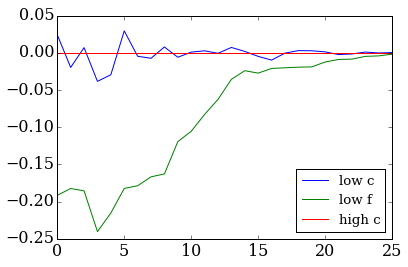

In [8]:
plt.plot(low1/high1-1., label = 'low c')
plt.plot(low2/high1-1., label = 'low f')
plt.plot(high1/high1 - 1., label = 'high c')
#plt.plot(high2/high1 - 1., label = 'high f')
plt.legend(loc = 'best', fontsize = 'small')

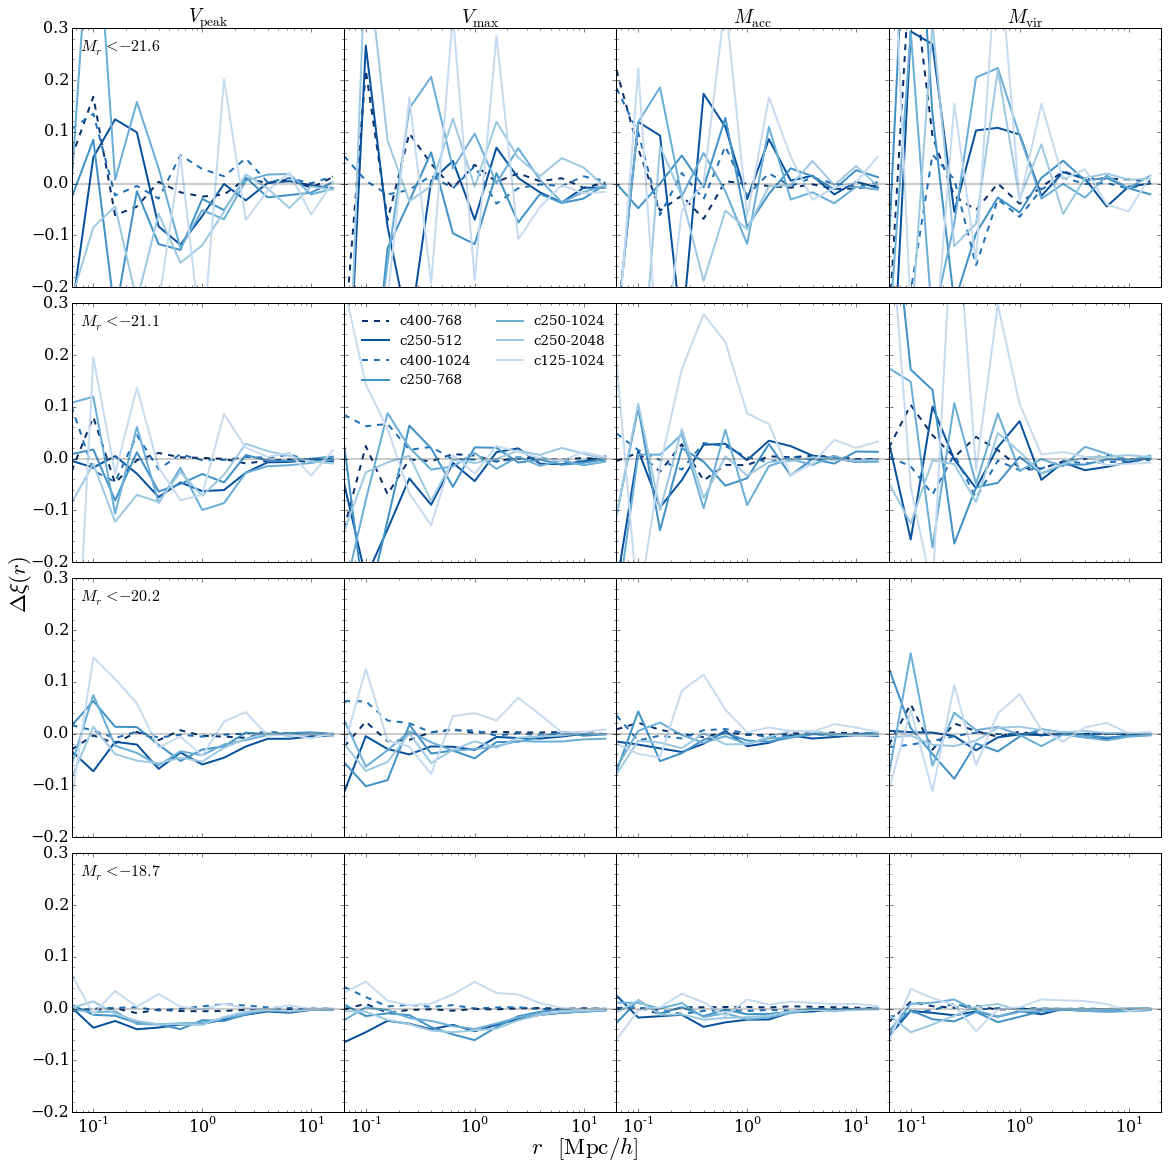

In [22]:
from palettable.colorbrewer.sequential import Blues_9
def get_color(i):
    return Blues_9.mpl_colors[-i-1]

x = rbins[1::2]
proxies = ['vpeak','vmax','macc','mvir']
nd_log_list_this = (-3.2, -2.7, -2.2, -1.7)
cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024','c400-768']
cases = sorted(cases, key=lambda case: parse_boxname(case)[2], reverse=True)

fig, ax = plt.subplots(ncols=len(proxies), nrows=len(nd_log_list_this), figsize=(16, 4*len(nd_log_list_this)), sharex=True, sharey='row')

for i, (ax_row, nd_log) in enumerate(zip(ax, nd_log_list_this)):
    for j, (ax_this, proxy) in enumerate(zip(ax_row, proxies)):
        for k, case in enumerate(cases):
            box_size, npart, mass = parse_boxname(case)
            y = load_sim_pair_count(proxy, case, nd_log)/load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log) - 1.0
            ax_this.semilogx(x, y, c=get_color(k), lw=2, ls=('--' if box_size==400.0 else '-'), label=case);
        #plot settings:
        ax_this.axhline(0, c='k', lw=0.4);
        ax_this.set_xlim(rbins[1], rbins[-1]);
        ax_this.set_ylim(-0.2, 0.3);
        ax_this.minorticks_on();
        if not i: ax_this.set_title(r'${0}_{{\rm {1}}}$'.format(proxy[0].upper(), proxy[1:]));
        if not j: ax_this.text(0.03, 0.96, '$M_r < {:.1f}$'.format(af.match(10.0**nd_log)), transform=ax_this.transAxes, va='top');
        if i==1 and j==1: ax_this.legend(loc='best', frameon=False, ncol=2, fontsize='small');
            
plt.tight_layout(0, rect=(0.02, 0.02, 1.0, 1.0));
fig.text(0.01, 0.5, r'$\Delta \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.01, r'$r \; [{\rm Mpc}/h]$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/sim_lowres.png')

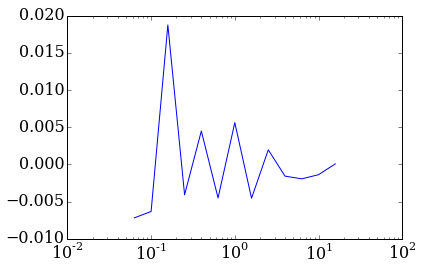

In [23]:
nd_log = -1.7
high = load_pair_count('mvir', 'c250-2560', nd_log)
low = load_sim_pair_count('mvir', 'c250-512', nd_log)
plt.semilogx(rbins[1::2],(low-high)/high)

In [29]:
def partperhalo(case, nd_log,r):
    cut = load_nd_limits('mvir', case)[closest_ndidx(nd_log)]
    m = parse_boxname(case)[2]
    return cut/m

cases = ['c250-2048','c250-1024', 'c250-768', 'c250-512','c125-1024','c400-1024','c400-768']
cases = ['c250-1024', 'c250-512', 'c250-768','c125-1024','c400-1024']
Npartperhalo = np.zeros((len(cases),len(nd_log_list)))
for j,case in enumerate(cases):
    cut = load_nd_limits('mvir', case)
    mass = parse_boxname(case)[2]
    Npartperhalo[j] = cut/mass

misspairs = np.zeros((len(proxies), len(cases),len(nd_log_list),len(rbins[1::2])))
for i,proxy in enumerate(proxies):
    for j,case in enumerate(cases):
        box_size, mass = parse_boxname(case)[1:]
        for k, nd_log in enumerate(nd_log_list):
            low = load_sim_pair_count(proxy, case, nd_log)
            if box_size == 250.:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2560', nd_log)
            else:
                high = load_pair_count(proxy, case.partition('-')[0]+'-2048', nd_log)
            misspairs[i,j,k] = (low-high)/high

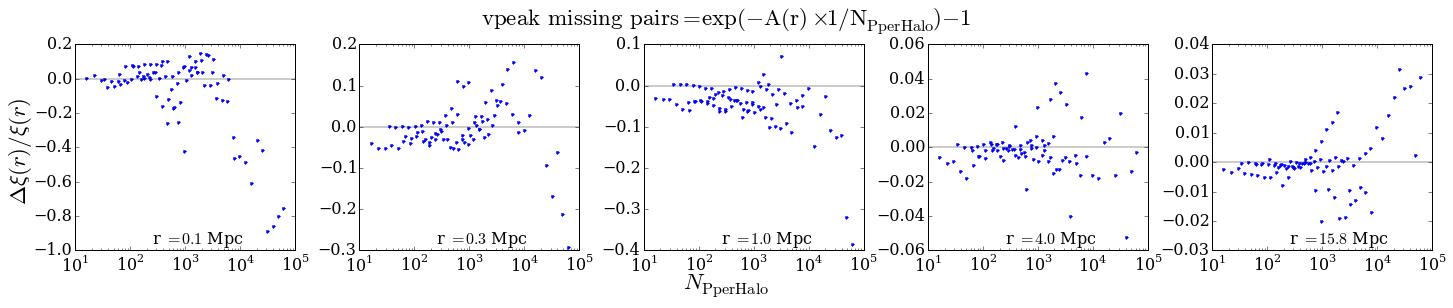

In [30]:
def closest_ridx(r):
    return np.abs(rbins[1::2]-r).argmin()

proxy = 'vpeak'
proxies = ['vpeak', 'vmax', 'mvir', 'macc']
pidx = proxies.index(proxy)
scales = (0.06,1.,5.,15.)
scales = rbins[1::2][::3]


fig, axarr = plt.subplots(ncols=len(scales), nrows=1, figsize=(4*len(scales), 4.), sharex=True, sharey=False)
for ii, (ax, r) in enumerate(zip(axarr, scales)):
    ridx = closest_ridx(r)
    
    ax.semilogx(Npartperhalo.flatten(), misspairs[pidx,:,:,ridx].flatten(), '.', label='nd='+str(nd_log),alpha=1.0,c='b')
    ax.axhline(0, c='k', lw=0.4)
    ax.text(0.35, 0.1, r'r $ = {0:.1f}$ Mpc'.format(rbins[1::2][closest_ridx(r)]), transform=ax.transAxes, va='top', fontsize='medium');
    #ax.set_xlim(0.8*resolution[-1], 1.1*resolution[0])
    #if ii==0: ax.legend(frameon=False, numpoints=1,ncol=2, loc='best',fontsize='small')
            
plt.tight_layout(0, rect=(0.02, 0.07, 1.0, 0.9));
fig.text(0.01, 0.5, r'$\Delta \xi(r)/ \xi(r)$', ha='center', va='center', rotation='vertical', fontsize='x-large');
fig.text(0.5, 0.03, r'$N_{{\rm PperHalo}}$', ha='center', va='center', fontsize='x-large');
fig.text(0.5, 0.95, r'$ \rm  {0} \, missing \, pairs  =\exp(-A(r) \times 1/N_{{\rm PperHalo}})-1$'.format(proxy), ha='center', va='center', fontsize='x-large');
#fig.text(0.5, 0.95, r'${\rm V_{peak} \, missing \, pairs}=\exp(-(A-B \log(r))^C \times 1/N_{{\rm PperHalo}})-1$', ha='center', va='center', fontsize='x-large');
#plt.savefig('plots/test/missingpairs_{}_Npperhalo.png'.format(proxy))

# testing

In [240]:
case_low = 'c250-512'
case_high = 'c250-2560'
proxy = 'mvir'

box_size = case_low[1:4]
hlist_path_low ='/u/ki/yymao/ki21/sham_test/resolution-test/{}/hlist_1.00000.npy'.format(case)
#if float(box_size) == 250.:
#    case_high = case.partition('-')[0] + '-2560'
#else:
#    case_high = case.partition('-')[0] + '-2048'
hlist_path_high ='/u/ki/yymao/ki21/sham_test/resolution-test/{}/hlist_1.00000.npy'.format(case_high)

#run
halos_high = np.load(hlist_path_high)
halos_low = np.load(hlist_path_low)

In [259]:
proxy = 'mvir'
nd_log_list = np.linspace(-5.0,-1.7,34)
k = (10.**nd_log_list*float(box_size)**3).astype(int)
s = halos_low[proxy].argsort()
proxy_log_list = np.array([np.log10(halos_low[proxy][s[-j]]) for j in k])
proxy_log_list = np.insert(proxy_log_list,0, np.inf)
proxy_log_list

array([         inf,  13.60756224,  13.52685599,  13.45392959,
        13.37857958,  13.29203444,  13.20763437,  13.112605  ,
        13.0277572 ,  12.94398888,  12.84348194,  12.75151005,
        12.64952957,  12.55315455,  12.45499722,  12.35372394,
        12.24797327,  12.14332713,  12.03582983,  11.92659965,
        11.82144802,  11.7126497 ,  11.60119053,  11.49164179,
        11.38075377,  11.27137687,  11.16166741,  11.04960561,
        10.93766831,  10.8260748 ,  10.71222867,  10.59889989,
        10.48387245,  10.36903022,  10.25285303])

In [292]:
np.abs(nd_log_list - -3.3).argmin()

17

In [293]:
nd_log_list[17]

-3.2999999999999998

In [242]:
proxyfunc_low = np.zeros(len(proxy_log_list) - 1)
for i,(high, low) in enumerate(zip(proxy_log_list[:-1], proxy_log_list[1:])):
    proxyfunc_low[i] = int(np.count_nonzero(np.logical_and(halos_low[proxy] > 10.**low,\
                                                   halos_low[proxy] < 10.**high)))
proxyfunc_high = np.zeros(len(proxy_log_list) - 1)
for i,(high, low) in enumerate(zip(proxy_log_list[:-1], proxy_log_list[1:])):
    proxyfunc_high[i] = np.count_nonzero(np.logical_and(halos_high[proxy] > 10.**low,\
                                                   halos_high[proxy] < 10.**high))

In [260]:
n_halos_list = np.insert(np.ediff1d(k) ,0, k[0])
print n_halos_list


[  156    40    51    64    81   102   128   161   202   256   321   405
   509   641   807  1017  1279  1611  2027  2553  3214  4045  5093  6412
  8073 10162 12794 16106 20277 25526 32136 40458 50932 64120]


In [219]:
# select from high resolution
import random
sim_idx = [[] for i in range(len(proxyfunc_low))]
temp = np.array([]).astype(int)
for i,(high, low) in enumerate(zip(proxy_log_list[:-1], proxy_log_list[1:])):
    temp = np.concatenate((temp, np.random.choice(np.where(np.logical_and(halos_high[proxy] > 10.**low,halos_high[proxy] < 10.**high))[0]\
                               , proxyfunc_low[i])))
    sim_idx[i] = temp
sim_idx = np.array(sim_idx)

/afs/slac.stanford.edu/u/ki/iameric/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [236]:
len(sim_idx[1])

2476

In [316]:
test = np.load('../ki22/resolution_study/random_sample_pair_counts/pairs_mvir/c250-512_nd-5.0_run0.npy')
test

array([ 68,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,  68,
        68,  68,  68,  76,  77,  83,  84,  84,  88,  89, 103, 115, 146, 170])

In [329]:
nd_log = -2.5
test1 = np.ediff1d(np.load('../ki22/resolution_study/simple_pair_counts/pairs_vpeak/c400-768_nd{:.1f}_c.npy'.format(nd_log)))
test2 = np.ediff1d(np.load('../ki22/resolution_study/simple_pair_counts/pairs_vpeak/c400-2048_nd{:.1f}_c.npy'.format(nd_log)))
test3 = np.ediff1d(np.load('../ki22/resolution_study/random_sample_pair_counts/pairs_vpeak/c400-768_nd{:.1f}_run0.npy'.format(nd_log)))

In [330]:
test3

array([    797,     900,    1446,    1825,    2416,    3760,    5232,
          7183,    9287,   11840,   15862,   20966,   26259,   33726,
         42718,   56580,   76498,  108653,  162975,  248529,  399715,
        649875, 1092511, 1907451, 3432039, 6341036])

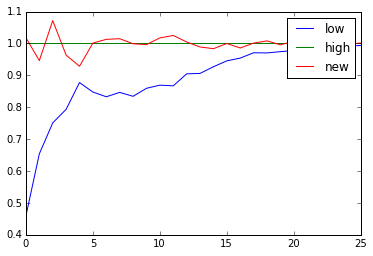

In [331]:
plt.plot(test1/test2.astype(float),label = 'low')
plt.plot(test2/test2.astype(float), label = 'high')
plt.plot(test3/test2.astype(float), label = 'new')
plt.legend()

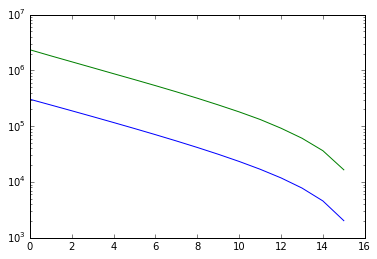

In [125]:
plt.semilogy(np.cumsum(proxyfunc_low)[::-1])
plt.semilogy(np.cumsum(proxyfunc_high)[::-1])

In [107]:
np.count_nonzero(halos_low['vpeak']>10.**2.321)

7828

In [86]:
# proxy function for low res
m_bin_list = np.linspace(10.0, 15.5, 56)
m_log_list = np.linspace(10.5,12.5, 21)

massfunc_low = np.zeros(len(m_bin_list) - 1)
for i,(mlow, mhigh) in enumerate(zip(m_bin_list[:-1], m_bin_list[1:])):
    massfunc_low[i] = np.count_nonzero(np.logical_and(halos_low['mvir'] > 10.**mlow,\
                                                   halos_low['mvir'] < 10.**mhigh))

massfunc_high = np.zeros(len(m_bin_list) - 1)
for i,(mlow, mhigh) in enumerate(zip(m_bin_list[:-1], m_bin_list[1:])):
    massfunc_high[i] = np.count_nonzero(np.logical_and(halos_high['mvir'] > 10.**mlow,\
                                                   halos_high['mvir'] < 10.**mhigh))



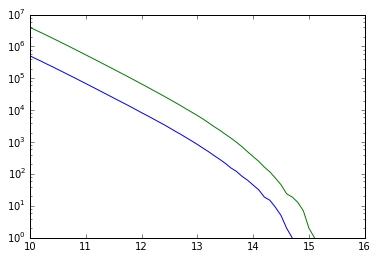

In [87]:
plt.semilogy(m_bin_list[:-1][::-1],np.cumsum(massfunc_low[::-1]))
plt.semilogy(m_bin_list[:-1][::-1],np.cumsum(massfunc_high[::-1]))

In [3]:

k = (10.0**nd_log_list * (float(box_size)**3)).astype(int)
k *= -1

proxylim = np.array([halos_low[s] for j in k])

s = halos[proxy].argsort()
k = np.searchsorted(halos[proxy], 10.**m_log_list, sorter=s)

(12513332,)

In [88]:
np.log10(max(halos_low['vpeak']))

3.1976416306980191

(array([  1.98100000e+03,   9.91400000e+03,   3.06110000e+04,
          6.57350000e+04,   1.23223000e+05,   2.09546000e+05,
          2.98828000e+05,   3.76763000e+05,   4.97378000e+05,
          7.28354000e+05,   1.08326200e+06,   1.53270000e+06,
          1.94334000e+06,   2.17303100e+06,   2.18748500e+06,
          2.02471600e+06,   1.73075000e+06,   1.38184700e+06,
          1.04511400e+06,   7.65095000e+05,   5.52198000e+05,
          4.00024000e+05,   2.90233000e+05,   2.10600000e+05,
          1.52492000e+05,   1.10299000e+05,   7.94730000e+04,
          5.71550000e+04,   4.15510000e+04,   2.99410000e+04,
          2.12310000e+04,   1.52470000e+04,   1.09140000e+04,
          7.59800000e+03,   5.46200000e+03,   3.89900000e+03,
          2.71600000e+03,   1.91300000e+03,   1.38400000e+03,
          9.01000000e+02,   5.73000000e+02,   4.09000000e+02,
          2.84000000e+02,   1.57000000e+02,   9.80000000e+01,
          5.90000000e+01,   3.30000000e+01,   1.40000000e+01,
        

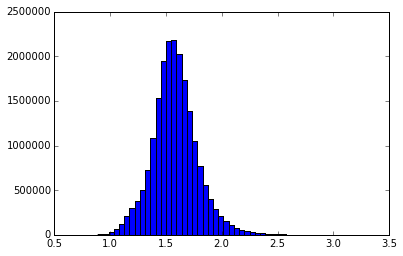

In [89]:
plt.hist(np.log10(halos_high['vpeak']), bins = 50)

(array([  1.27000000e+02,   5.15000000e+02,   1.25200000e+03,
          2.46600000e+03,   4.84100000e+03,   1.18580000e+04,
          2.65020000e+04,   4.70550000e+04,   6.90830000e+04,
          1.00122000e+05,   1.30253000e+05,   1.56565000e+05,
          1.71043000e+05,   1.72708000e+05,   1.61634000e+05,
          1.45317000e+05,   1.26734000e+05,   1.05227000e+05,
          8.37790000e+04,   6.49810000e+04,   4.87870000e+04,
          3.71290000e+04,   2.74350000e+04,   2.01890000e+04,
          1.48600000e+04,   1.09660000e+04,   7.79600000e+03,
          5.66000000e+03,   4.25900000e+03,   2.95100000e+03,
          2.24400000e+03,   1.58300000e+03,   1.23700000e+03,
          8.81000000e+02,   6.48000000e+02,   4.30000000e+02,
          3.06000000e+02,   2.46000000e+02,   1.58000000e+02,
          1.06000000e+02,   6.20000000e+01,   5.00000000e+01,
          3.70000000e+01,   2.20000000e+01,   1.20000000e+01,
          1.10000000e+01,   7.00000000e+00,   1.00000000e+00,
        

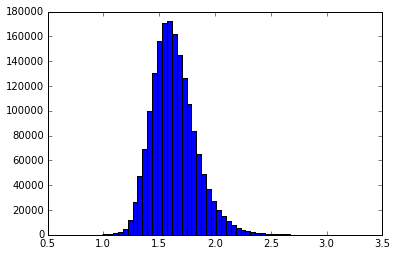

In [90]:
plt.hist(np.log10(halos_low['vpeak']), bins=50)